In [19]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
def get_accuracy_top1(j=6, h=0, p=6, k=250, model1='base', model2='bert-base-uncased'):
    asif_value = 0
    with open(f'retrieval_{model1}_layer{j}_{model2}_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

# EncodecMAE  (con encodec y con mel)

### CKA

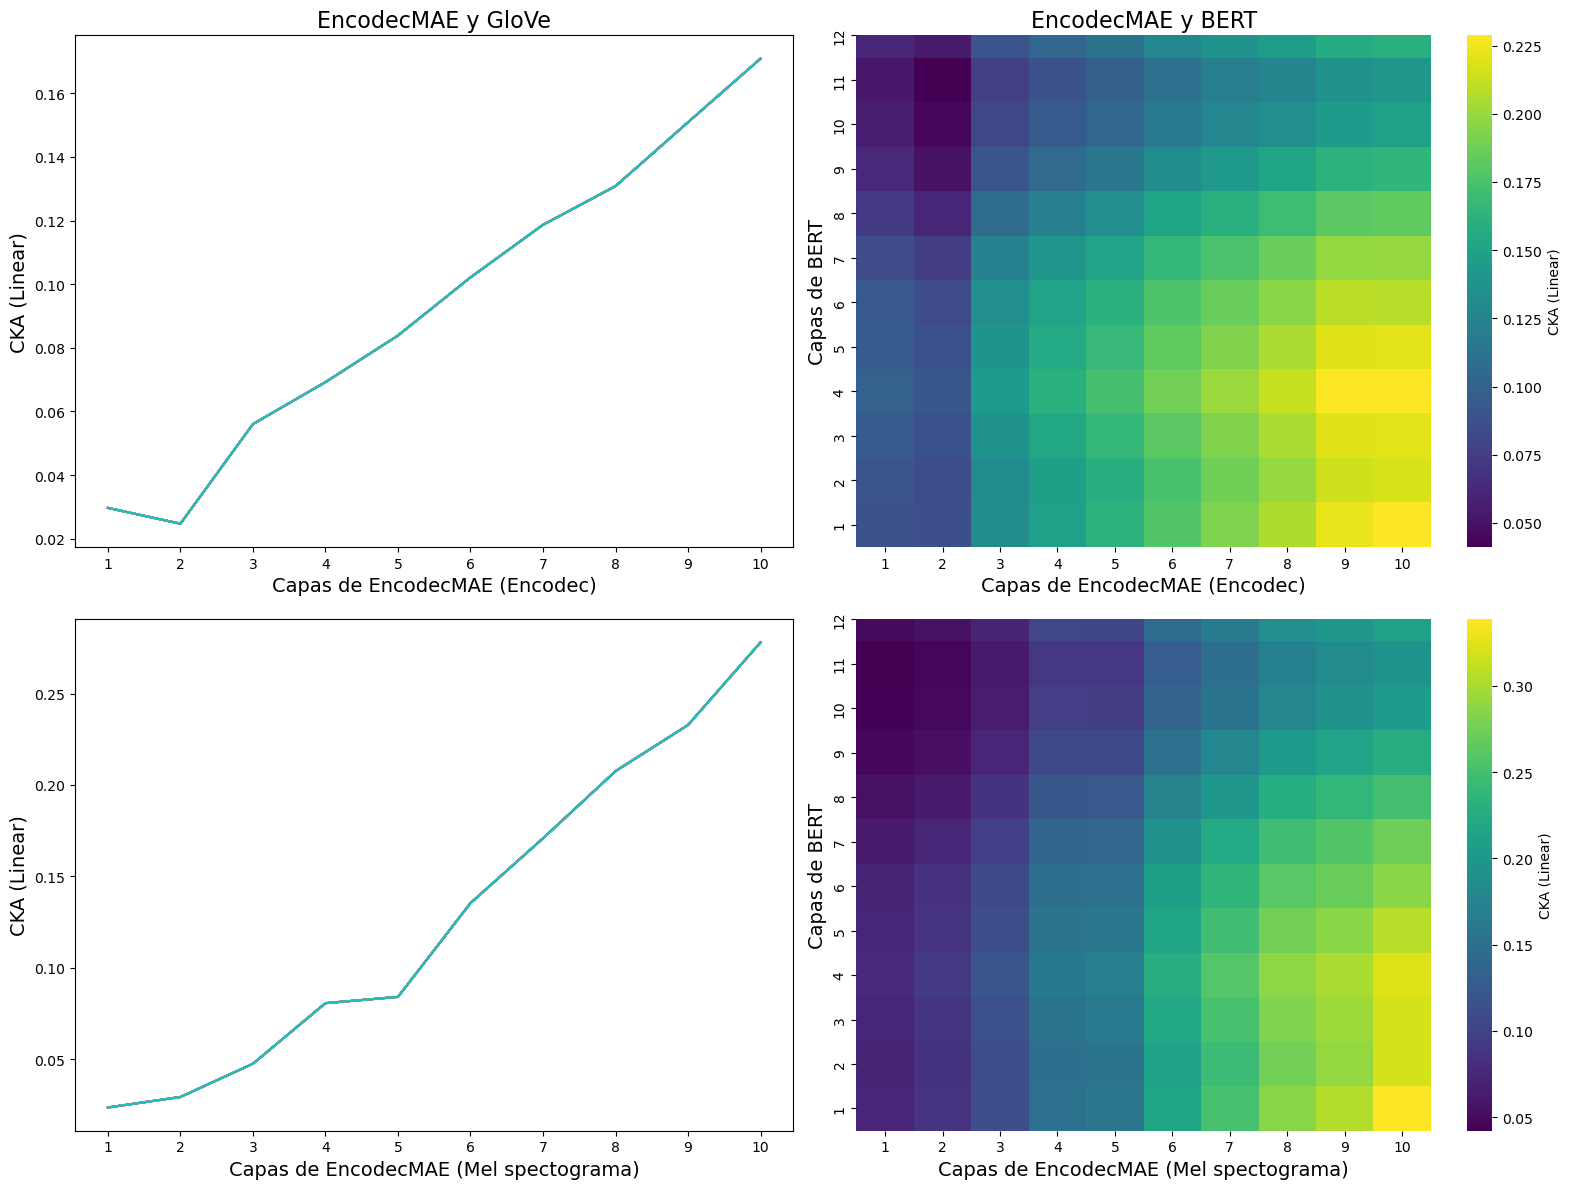

In [21]:
file_path_heatmap = Path('cka_bert-base-uncased_encodecmae_base.json')
with file_path_heatmap.open('r', encoding='utf-8') as file:
    encodec_bert = json.load(file)
encodec_bert_array = np.array(encodec_bert)

# Cargar datos para el gráfico de línea
file_path_line = Path('cka_glove_encodecmae_base.json')
with file_path_line.open('r', encoding='utf-8') as file:
    glove_bert = json.load(file)

file_path_heatmap = Path('cka_encodecmae_mel256-ec-base_bert-base-uncased.json')
with file_path_heatmap.open('r', encoding='utf-8') as file:
    encodec_bert_mel = json.load(file)
encodec_bert_mel_array = np.array(encodec_bert_mel)

# Cargar datos para el gráfico de línea
file_path_line = Path('cka_glove_encodecmae_mel256-ec-base.json')
with file_path_line.open('r', encoding='utf-8') as file:
    glove_bert_mel = json.load(file)    

fontsize_labels = 14
fontsize_ticks = 12
fontsize_title = 16
# Configurar la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 1 fila, 2 columnas
# Gráfico de línea
axs[0,0].plot(range(1, 11), glove_bert, label='Encodec vs Glove CKA')
axs[0,0].set_xlabel('Capas de EncodecMAE (Encodec)', fontsize=fontsize_labels)
axs[0,0].set_ylabel('CKA (Linear)', fontsize=fontsize_labels)
axs[0,0].set_xticks(range(1, 11))
axs[0,0].set_title('EncodecMAE y GloVe', fontsize=fontsize_title)

# Gráfico de calor

sns.heatmap(encodec_bert_array.T, ax=axs[0,1], fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'})
axs[0,1].set_xlabel("Capas de EncodecMAE (Encodec)", fontsize=fontsize_labels)
axs[0,1].set_ylabel("Capas de BERT", fontsize=fontsize_labels)
axs[0,1].set_ylim(0, len(encodec_bert_array))
axs[0,1].set_xticks([i + 0.5 for i in range(len(encodec_bert_array))])
axs[0,1].set_xticklabels(range(1, len(encodec_bert_array) + 1))
axs[0,1].set_yticks([i + 0.5 for i in range(len(encodec_bert_array[0]))])
axs[0,1].set_yticklabels(range(1, len(encodec_bert_array[0]) + 1))
axs[0,1].set_title('EncodecMAE y BERT', fontsize=fontsize_title)


axs[1,0].plot(range(1, 11), glove_bert_mel, label='Encodec vs Glove CKA')
axs[1,0].set_xlabel('Capas de EncodecMAE (Mel spectograma)', fontsize=fontsize_labels)
axs[1,0].set_ylabel('CKA (Linear)', fontsize=fontsize_labels)
axs[1,0].set_xticks(range(1, 11))

sns.heatmap(encodec_bert_mel_array, ax=axs[1,1], fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'})
axs[1,1].set_xlabel("Capas de EncodecMAE (Mel spectograma)", fontsize=fontsize_labels)
axs[1,1].set_ylabel("Capas de BERT", fontsize=fontsize_labels)
axs[1,1].set_ylim(0, len(encodec_bert_array))
axs[1,1].set_yticks([i + 0.5 for i in range(len(encodec_bert_mel_array))])
axs[1,1].set_yticklabels(range(1, len(encodec_bert_mel_array) + 1))
axs[1,1].set_xticks([i + 0.5 for i in range(len(encodec_bert_mel_array[0]))])
axs[1,1].set_xticklabels(range(1, len(encodec_bert_mel_array[0]) + 1))


plt.tight_layout()
plt.show()

### ASIF

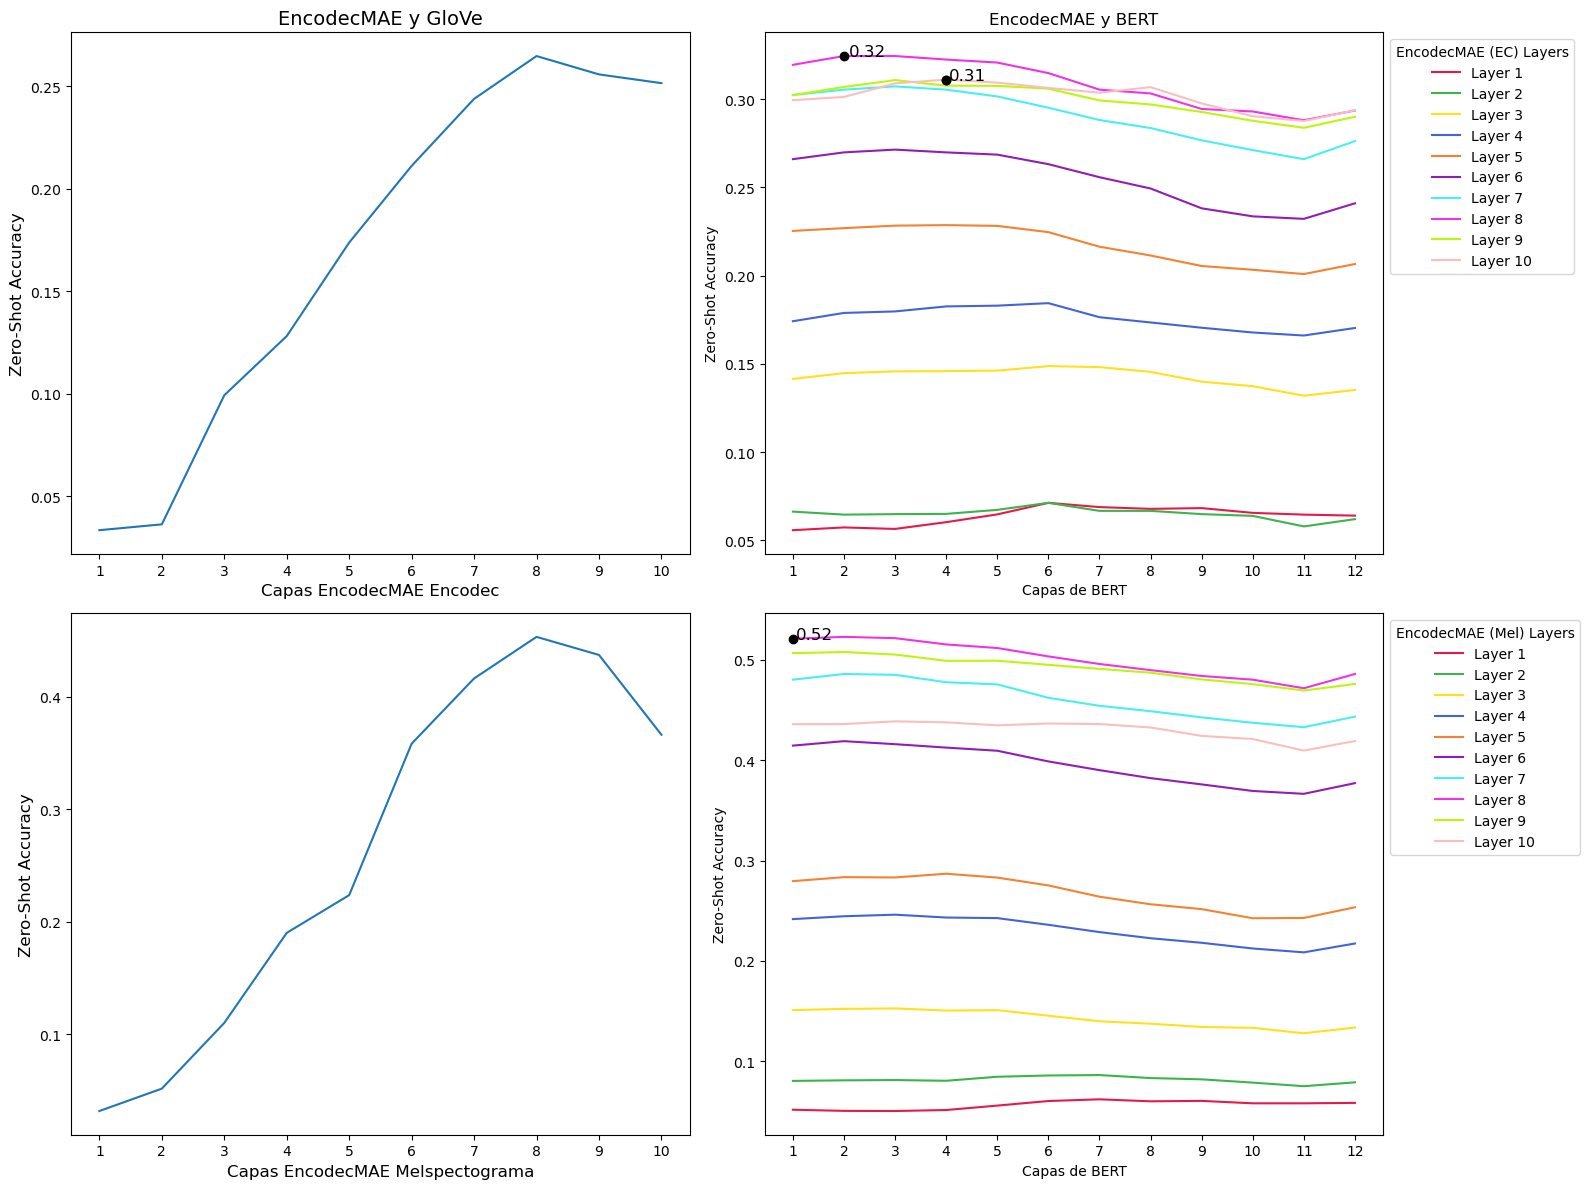

In [34]:
# Define a color palette with 12 distinct colors
colors = [
    '#e6194B',  # bright red
    '#3cb44b',  # bright green
    '#ffe119',  # bright yellow
    '#4363d8',  # bright blue
    '#f58231',  # bright orange
    '#911eb4',  # purple
    '#46f0f0',  # turquoise
    '#f032e6',  # magenta
    '#bcf60c',  # lime green
    '#fabebe',  # pink
    '#008080',  # teal
    '#e6beff'   # lavender
]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 1 row, 2 columns

asif_similarity_line_ec = np.zeros((1, 10))
for i_1 in range(10):
    asif_similarity_line_ec[0, i_1] = get_accuracy_top1(j=i_1, h=0, p=6, k=250, model1='base', model2='glove')[0]

axs[0,0].plot(range(1, 11), asif_similarity_line_ec[0], label='EncodecMAE vs GloVe')
axs[0,0].set_xlabel('Capas EncodecMAE Encodec', fontsize=12)
axs[0,0].set_ylabel('Zero-Shot Accuracy', fontsize=12)
axs[0,0].set_xticks(range(1, 11))
axs[0,0].set_title('EncodecMAE y GloVe', fontsize=14)

asif_similarity_line_mel = np.zeros((1, 10))
for i_1 in range(10):
    asif_similarity_line_mel[0, i_1] = get_accuracy_top1(j=i_1, h=0, p=6, k=250, model1='mel256-ec-base', model2='glove')[0]

axs[1,0].plot(range(1, 11), asif_similarity_line_mel[0], label='EncodecMAE vs GloVe')
axs[1,0].set_xlabel('Capas EncodecMAE Melspectograma', fontsize=12)
axs[1,0].set_ylabel('Zero-Shot Accuracy', fontsize=12)
axs[1,0].set_xticks(range(1, 11))

asif_similarity1_ec = np.zeros((12, 10))
for i_1 in range(10):
    for j_1 in range(12):
        asif_similarity1_ec[j_1, i_1] = get_accuracy_top1(j=i_1, h=j_1, p=4, k=100, model1='base', model2='bert-base-uncased')[0] 

for j in range(10):  # Assuming 10 layers in the comparison model
    axs[0,1].plot(range(1, 13), asif_similarity1_ec[:, j], label=f'Layer {j + 1}', color=colors[j])
layer_encodec = 8 - 1  # Adjusting index for zero-based indexing
layer_bert = 2 - 1  # Adjusting index for zero-based indexing
similarity_value = asif_similarity1_ec[layer_bert, layer_encodec]
axs[0,1].plot(layer_bert + 1, similarity_value, 'o', color='black', markersize=6)
axs[0,1].text(layer_bert + 1.1, similarity_value, f'{similarity_value:.2f}', fontsize=12, color='black')
axs[0,1].plot(4, asif_similarity1_ec[3, 9], 'o', color='black', markersize=6)
axs[0,1].text(3 + 1.05,  asif_similarity1_ec[3, 9], f'{asif_similarity1_ec[3, 9]:.2f}', fontsize=12, color='black')
axs[0,1].set_xlabel('Capas de BERT')
axs[0,1].set_ylabel('Zero-Shot Accuracy')
axs[0,1].set_title('EncodecMAE y BERT')
axs[0,1].set_xticks(range(1, 13))
axs[0,1].legend(title="EncodecMAE (EC) Layers", loc='upper left', bbox_to_anchor=(1, 1))
#Encodec Mel y bert
asif_similarity1_mel = np.zeros((12, 10))
for i_1 in range(10):
    for j_1 in range(12):
        asif_similarity1_mel[j_1, i_1] = get_accuracy_top1(j=i_1, h=j_1, p=4, k=100, model1='mel256-ec-base', model2='bert-base-uncased')[0]

for j in range(10):  
    axs[1,1].plot(range(1, 13) , asif_similarity1_mel[:, j], label=f'Layer {j + 1}', color=colors[j])

axs[1,1].plot(1, asif_similarity1_mel[0, 7], 'o', color='black', markersize=6)
axs[1,1].text(1.05,  asif_similarity1_mel[0, 7], f'{asif_similarity1_mel[0, 7]:.2f}', fontsize=12, color='black')


axs[0,1].plot(4, asif_similarity1_ec[3, 9], 'o', color='black', markersize=6)
axs[1,1].set_xlabel('Capas de BERT')
axs[1,1].set_ylabel('Zero-Shot Accuracy')
axs[1,1].set_xticks(range(1, 13))
axs[1,1].legend(title="EncodecMAE (Mel) Layers", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# BEATs

### CKA

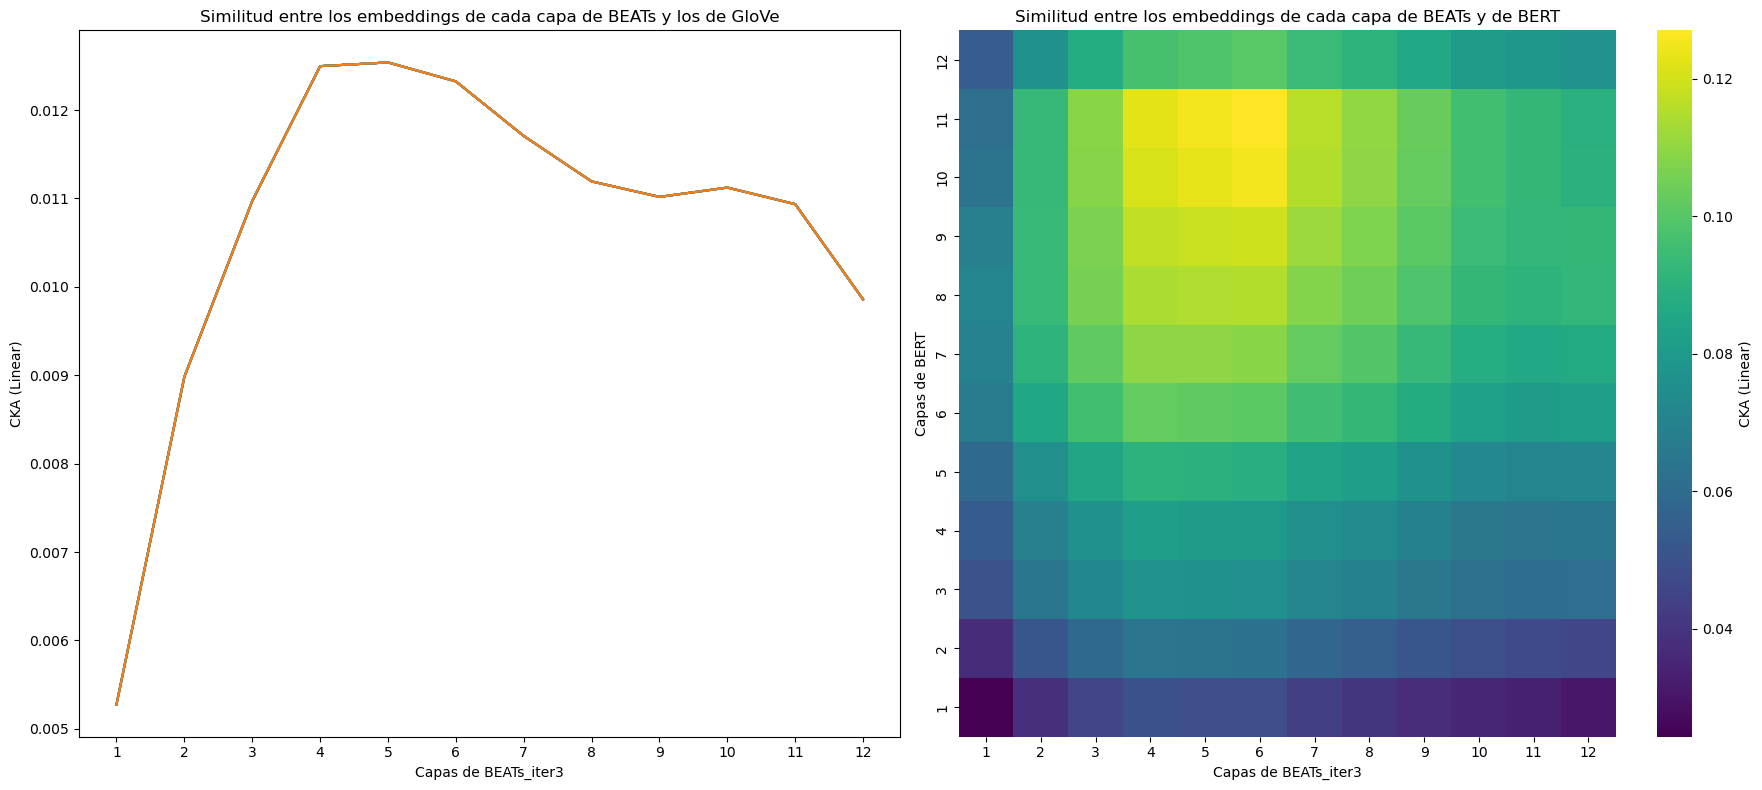

In [33]:
file_path = Path('cka_bert-base-uncased_BEATs_iter3.json')
with file_path.open('r', encoding='utf-8') as file:
    beats_bert = json.load(file)

beats_bert_array = np.array(beats_bert)

# Cargar datos de Glove y BEATs
file_path = Path('cka_glove_BEATs_iter3.json')
with file_path.open('r', encoding='utf-8') as file:
    glove_beats = json.load(file)

# Crear una figura y dos subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # 1 fila, 2 columnas

# Heatmap para BEATs y BERT
sns.heatmap(beats_bert_array.T, ax=axs[1], fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'})
axs[1].set_xlabel("Capas de BEATs_iter3")
axs[1].set_ylabel("Capas de BERT")
axs[1].set_ylim(0, len(beats_bert_array))
axs[1].set_xticks([i + 0.5 for i in range(len(beats_bert_array))])
axs[1].set_xticklabels(range(1, len(beats_bert_array) + 1))
axs[1].set_yticks([i + 0.5 for i in range(len(beats_bert_array[0]))])
axs[1].set_yticklabels(range(1, len(beats_bert_array[0]) + 1))
axs[1].set_title('Similitud entre los embeddings de cada capa de BEATs y de BERT')
# Gráfico de línea para Glove y BEATs
axs[0].plot(range(1, 13), glove_beats, label='Glove vs BEATs_iter3 CKA')
axs[0].set_xlabel('Capas de BEATs_iter3')
axs[0].set_ylabel('CKA (Linear)')
axs[0].set_xticks(range(1, 13))
axs[0].set_title('Similitud entre los embeddings de cada capa de BEATs y los de GloVe')


plt.tight_layout()
plt.show()

### ASIF GloVe

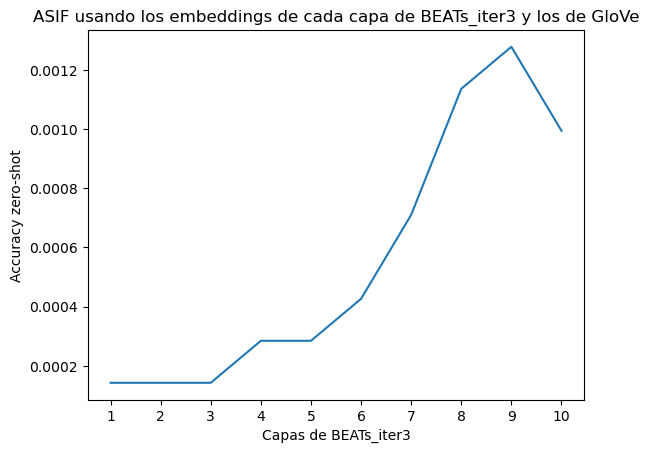

In [47]:
asif_similarity = np.zeros((1, 10))
for i_1 in range(10):
    asif_similarity[0, i_1] = get_accuracy_top1(j=i_1,h=0, model1='iter3', model2='glove')[0]
        

plt.plot(range(1,11), asif_similarity[0], label='beats_vs_glove')

plt.xlabel('Capas de BEATs_iter3')
plt.ylabel('Accuracy zero-shot')
plt.xticks(range(1,11))
plt.title('ASIF usando los embeddings de cada capa de BEATs_iter3 y los de GloVe')
plt.show()   

### ASIF BERT

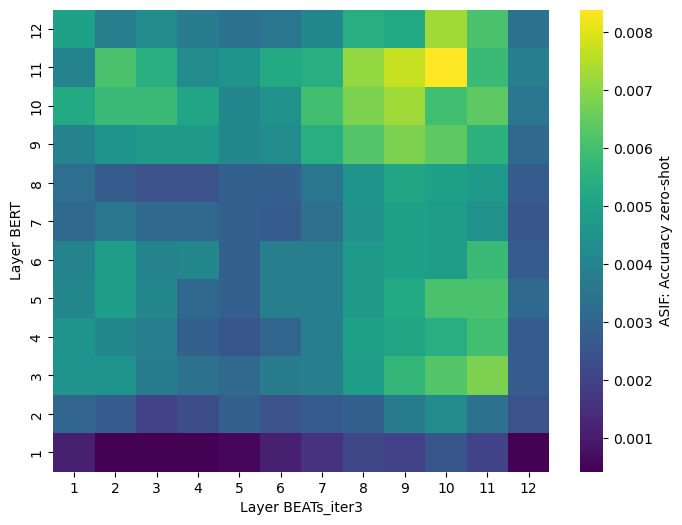

In [32]:
asif_similarity = np.zeros((12, 12))
for i_1 in range(12):
    for j_1 in range(12):
        asif_similarity[j_1, i_1] = get_accuracy_top1(j=i_1,h=j_1, model1='iter3', model2='bert-base-uncased')[0]

plt.figure(figsize=(8, 6))
sns.heatmap(asif_similarity, fmt=".1f", cmap='viridis', cbar_kws={'label': 'ASIF: Accuracy zero-shot'})
plt.xlabel(f"Layer BEATs_iter3")
plt.ylabel(f"Layer BERT")
plt.ylim(0, len(asif_similarity))
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=range(1, 12 + 1))
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=range(1, 12 + 1))
plt.show()        

# Encodec MAE - different datasets

In [53]:
with Path('cka_encodecmae_mel256-ec-base_bert-base-uncased.json').open('r', encoding='utf-8') as file:
    encodec_bert = json.load(file)

with Path('cka_encodecmae_mel256-ec-base-as_bert-base-uncased.json').open('r', encoding='utf-8') as file:
    mae_as = json.load(file)

with Path('cka_encodecmae_mel256-ec-base-fma_bert-base-uncased.json').open('r', encoding='utf-8') as file:
    mae_fma = json.load(file)

with Path('cka_encodecmae_mel256-ec-base-ll_bert-base-uncased.json').open('r', encoding='utf-8') as file:
    mae_ll = json.load(file)    

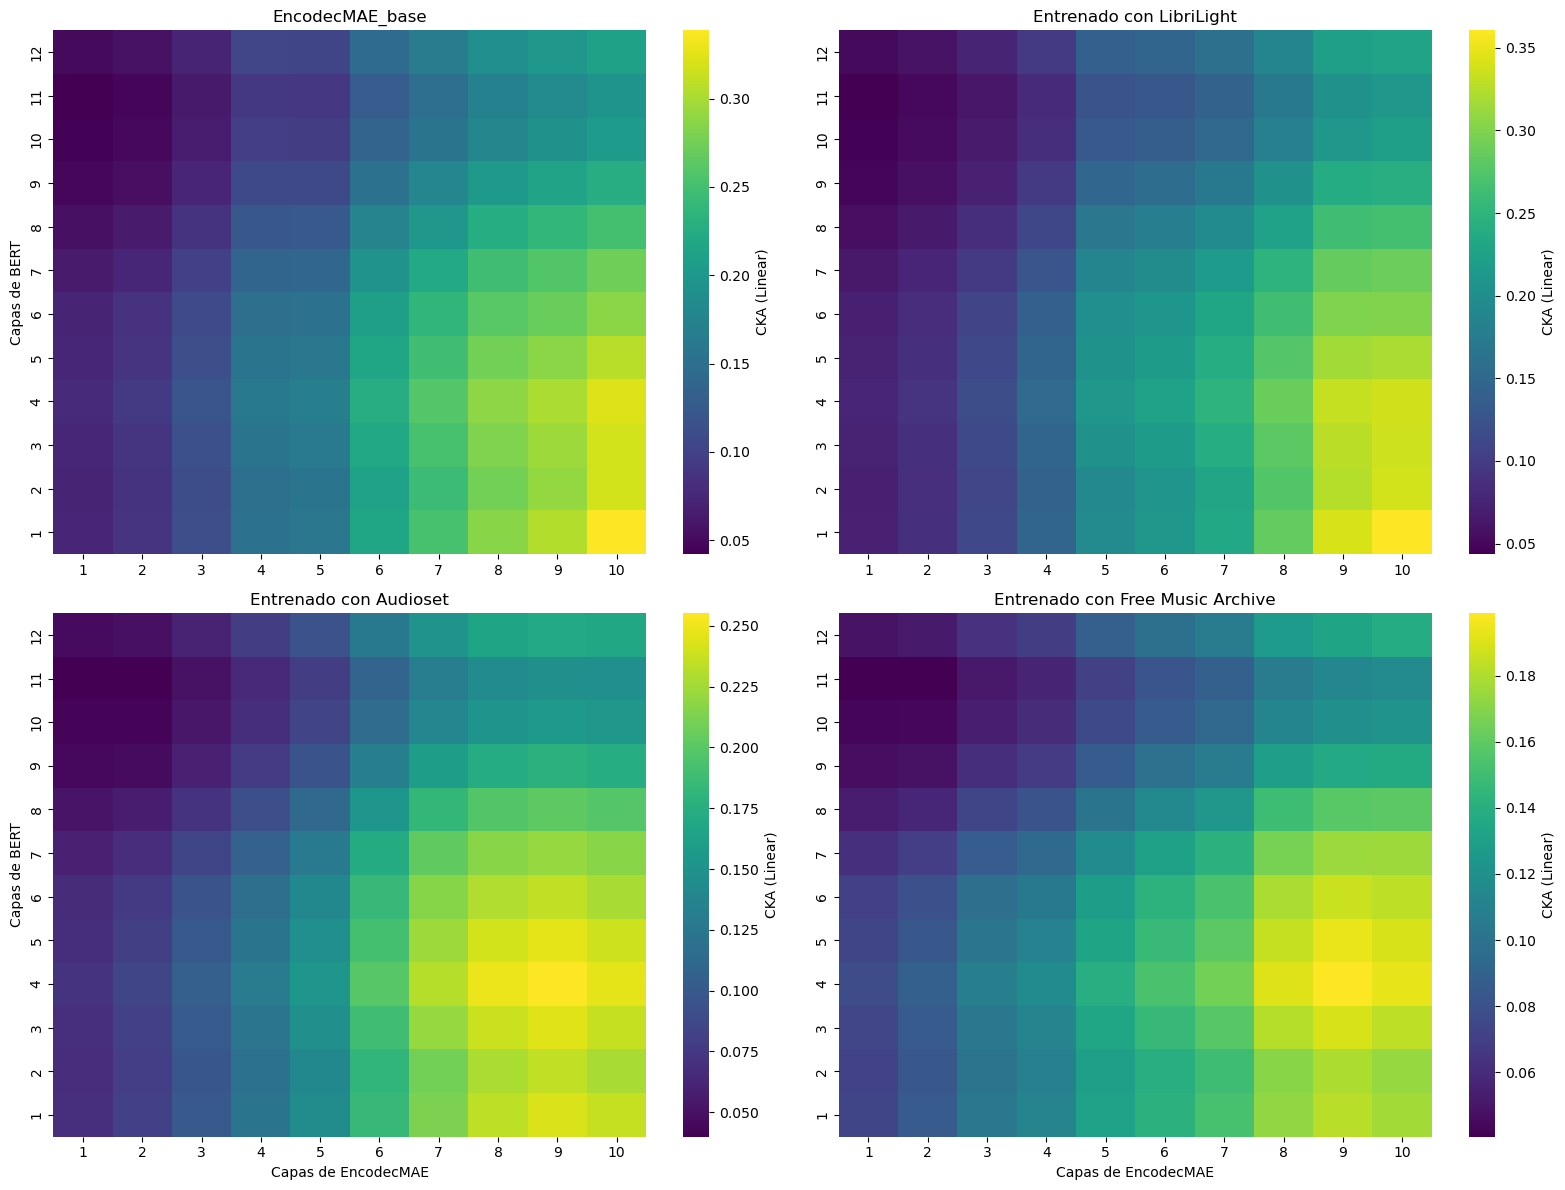

In [58]:
data1 = encodec_bert
data2 = mae_ll 
data3 = mae_as 
data4 = mae_fma
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1
sns.heatmap(data1, fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'}, ax=axs[0,0])
axs[0, 0].set_ylim(0, len(data1))
axs[0, 0].set_title('EncodecMAE_base')
axs[0, 0].set_ylabel('Capas de BERT')
axs[0, 0].set_xticks([i + 0.5 for i in range(len(data1[0]))])
axs[0, 0].set_xticklabels(range(1, len(data1[0]) + 1))
axs[0, 0].set_yticks([i + 0.5 for i in range(len(data1))])
axs[0, 0].set_yticklabels(range(1, len(data1) + 1))

# Gráfico 2
sns.heatmap(data2, fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'}, ax=axs[0, 1])
axs[0, 1].set_ylim(0, len(data2))
axs[0, 1].set_title('Entrenado con LibriLight')
axs[0, 1].set_xticks([i + 0.5 for i in range(len(data2[0]))])
axs[0, 1].set_xticklabels(range(1, len(data2[0]) + 1))
axs[0, 1].set_yticks([i + 0.5 for i in range(len(data2))])
axs[0, 1].set_yticklabels(range(1, len(data2) + 1))

# Gráfico 3
sns.heatmap(data3, fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'}, ax=axs[1, 0])
axs[1, 0].set_ylim(0, len(data3))
axs[1, 0].set_title('Entrenado con Audioset')
axs[1, 0].set_xlabel('Capas de EncodecMAE')
axs[1, 0].set_ylabel('Capas de BERT')
axs[1, 0].set_xticks([i + 0.5 for i in range(len(data3[0]))])
axs[1, 0].set_xticklabels(range(1, len(data3[0]) + 1))
axs[1, 0].set_yticks([i + 0.5 for i in range(len(data3))])
axs[1, 0].set_yticklabels(range(1, len(data3) + 1))

# # Gráfico 4
sns.heatmap(data4, fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'}, ax=axs[1, 1])
axs[1, 1].set_ylim(0, len(data4))
axs[1, 1].set_title('Entrenado con Free Music Archive')
axs[1, 1].set_xlabel('Capas de EncodecMAE')
axs[1, 1].set_xticks([i + 0.5 for i in range(len(data4[0]))])
axs[1, 1].set_xticklabels(range(1, len(data4[0]) + 1))
axs[1, 1].set_yticks([i + 0.5 for i in range(len(data4))])
axs[1, 1].set_yticklabels(range(1, len(data4) + 1))

plt.tight_layout()
plt.show()